Project on Public Health Services France
-----------------

OVERVIEW:

In this tutorial notebook, we will be coving a health care data of foods containing sugar, protien, fat etc. 

Steps are:
- We will load our data from the data given by the french open food facts.

- We will first apply some EDA.

- We will also do some data cleaning as there are impossible values

- We will also calculate how much sugar content the fruit drinks in France contain. 

- Finally we will reduce to data to a small dataset and create widgets. This will help in grading the food in terms of nutigrade (fat, carbohydrate, protein content.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as sst
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

**We import the data**

In [2]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv',sep ='\t', lineterminator ='\n', low_memory=False)

In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,created_t,last_modified_t,cities,allergens_fr,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,3.207490e+05,3.207490e+05,0.0,0.0,0.0,248961.000000,248961.000000,0.0,248961.000000,0.0,...,49.000000,3046.000000,165.000000,948.000000,0.0,268.000000,221233.000000,221233.000000,0.0,0.0
mean,1.470622e+09,1.478938e+09,NaN,NaN,NaN,1.936384,0.019658,NaN,0.055246,NaN,...,6.425698,31.376615,15.412121,49.547785,NaN,341.700764,9.164736,9.057261,NaN,NaN
std,3.307000e+07,2.084030e+07,NaN,NaN,NaN,2.502319,0.140518,NaN,0.269203,NaN,...,2.047841,31.947699,3.753028,18.757932,NaN,425.211439,9.055796,9.183461,NaN,NaN
min,0.000000e+00,1.332368e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,1.462984e+09,1.479389e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,1.489058e+09,1.489062e+09,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,...,7.200000,22.100000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,1.489079e+09,1.489093e+09,NaN,NaN,NaN,3.000000,0.000000,NaN,0.000000,NaN,...,7.400000,50.950000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,1.492737e+09,1.492737e+09,NaN,NaN,NaN,31.000000,2.000000,NaN,6.000000,NaN,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [5]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [6]:
data.describe()

,created_t,last_modified_t,cities,allergens_fr,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,3.207490e+05,3.207490e+05,0.0,0.0,0.0,248961.000000,248961.000000,0.0,248961.000000,0.0,...,49.000000,3046.000000,165.000000,948.000000,0.0,268.000000,221233.000000,221233.000000,0.0,0.0
mean,1.470622e+09,1.478938e+09,NaN,NaN,NaN,1.936384,0.019658,NaN,0.055246,NaN,...,6.425698,31.376615,15.412121,49.547785,NaN,341.700764,9.164736,9.057261,NaN,NaN
std,3.307000e+07,2.084030e+07,NaN,NaN,NaN,2.502319,0.140518,NaN,0.269203,NaN,...,2.047841,31.947699,3.753028,18.757932,NaN,425.211439,9.055796,9.183461,NaN,NaN
min,0.000000e+00,1.332368e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,1.462984e+09,1.479389e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,1.489058e+09,1.489062e+09,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,...,7.200000,22.100000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,1.489079e+09,1.489093e+09,NaN,NaN,NaN,3.000000,0.000000,NaN,0.000000,NaN,...,7.400000,50.950000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,1.492737e+09,1.492737e+09,NaN,NaN,NaN,31.000000,2.000000,NaN,6.000000,NaN,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


## Cleaning of the data

In [7]:
data.isna().sum()

code                            0
url                             0
creator                         2
created_t                       0
created_datetime                1
                            ...  
carbon-footprint_100g      320481
nutrition-score-fr_100g     99516
nutrition-score-uk_100g     99516
glycemic-index_100g        320749
water-hardness_100g        320749
Length: 162, dtype: int64

In [8]:
data.isnull().mean(axis=1).sort_values(ascending=False)

255815    0.938272
175246    0.938272
199373    0.938272
218508    0.938272
226833    0.938272
            ...   
190643    0.456790
190641    0.450617
253902    0.444444
197571    0.444444
190774    0.432099
Length: 320749, dtype: float64

### I remove the column whose null values are greater than 80%

In [9]:
data = data[data.columns[data.isnull().mean() <= 0.8]]

In [10]:
data = data.drop(columns=['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'image_url', 'image_small_url', 'countries_fr', 'countries_tags'])
data.head()

,product_name,categories,categories_tags,categories_fr,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,Peanuts,NaN,NaN,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,Organic Salted Nut Mix,NaN,NaN,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,Organic Polenta,NaN,NaN,NaN,US,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.duplicated().sum()

19623

### We delete all data that are duplicates

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.head()

,product_name,categories,categories_tags,categories_fr,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,Peanuts,NaN,NaN,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,Organic Salted Nut Mix,NaN,NaN,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,Organic Polenta,NaN,NaN,NaN,US,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,242670.000000,242670.000000,242670.000000,2.548910e+05,237697.000000,224559.000000,138458.000000,139325.000000,237396.000000,239732.000000,196576.000000,253687.000000,249301.000000,249254.000000,133331.000000,136643.000000,136889.000000,136234.000000,216876.000000,216876.000000
mean,1.954428,0.020143,0.056047,1.142082e+03,12.617247,5.131065,0.075060,0.020235,32.232892,16.004795,2.852017,7.116179,2.022193,0.796287,0.000404,0.023900,0.126247,0.003708,9.212315,9.102796
std,2.513829,0.142208,0.271417,6.523266e+03,17.149439,8.008004,1.564621,0.364068,29.694937,22.293824,12.977166,8.409810,129.844834,51.124830,0.074430,2.270747,3.368092,0.217708,9.044051,9.174809
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.850000e+02,0.000000,0.000000,0.000000,0.000000,6.130000,1.300000,0.000000,0.710000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,5.100000,1.800000,0.000000,0.000000,21.180000,5.800000,1.500000,4.800000,0.590000,0.232283,0.000000,0.000000,0.036000,0.001030,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.000000,7.140000,0.000000,0.021000,58.500000,24.000000,3.600000,10.000000,1.384300,0.545000,0.000107,0.003700,0.107000,0.002400,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


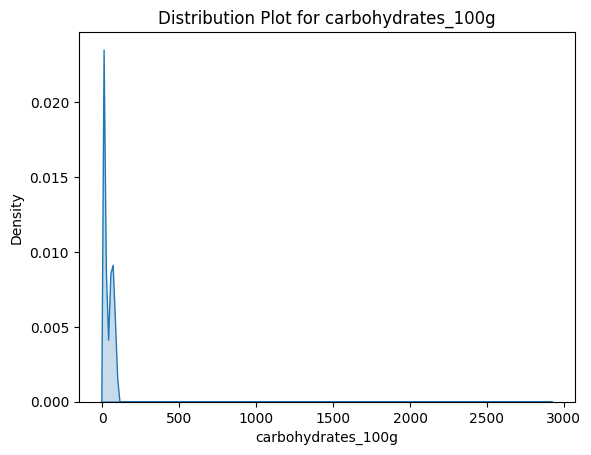

In [15]:
sns.kdeplot(data['carbohydrates_100g'], fill=True).set_title('Distribution Plot for carbohydrates_100g');

### We need to clean the data more because there are impossible values.

In [16]:
F = ["fat_100g", "saturated-fat_100g", "trans-fat_100g", "carbohydrates_100g","sugars_100g", "fiber_100g", "proteins_100g","salt_100g", "vitamin-a_100g","vitamin-c_100g","calcium_100g","sodium_100g"]
for x in F:
    data = data[data[x]<= 100]

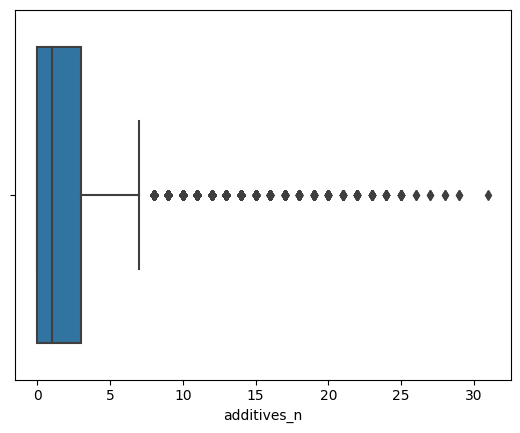

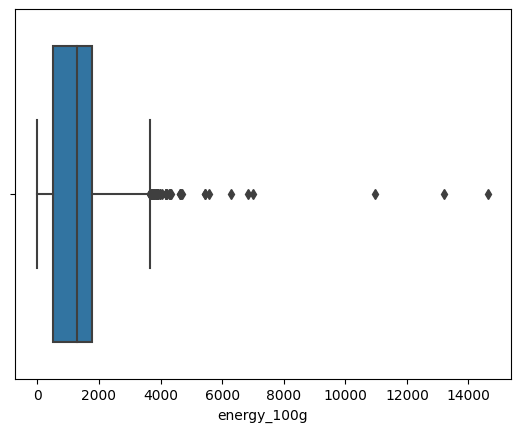

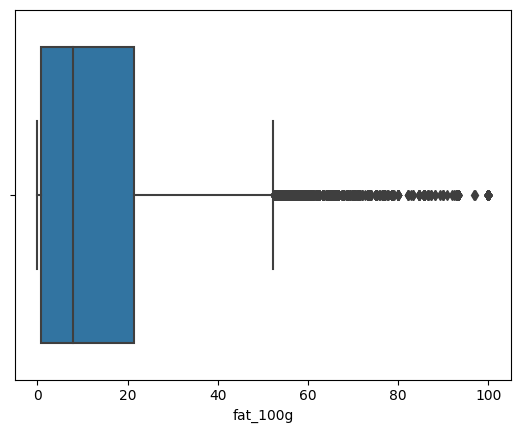

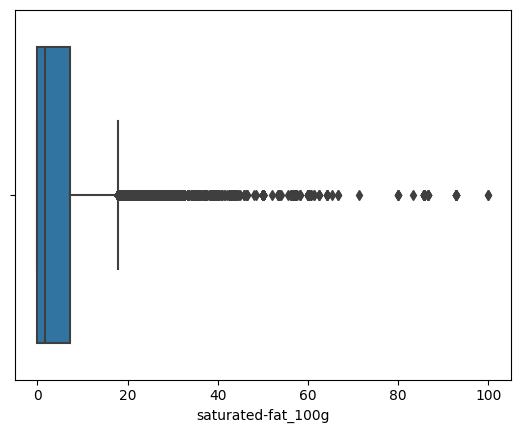

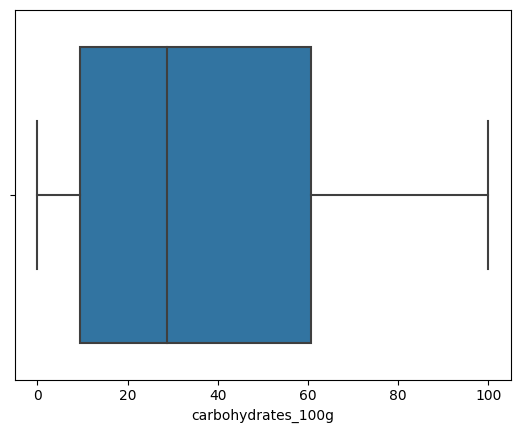

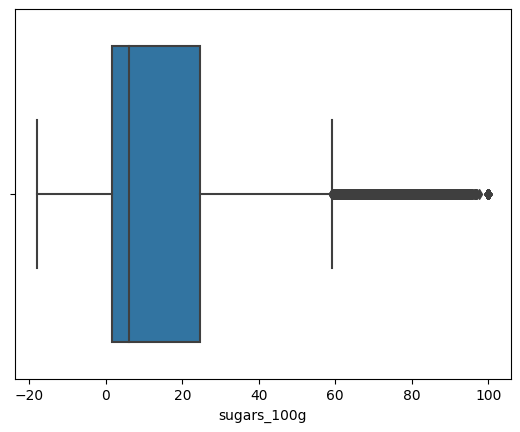

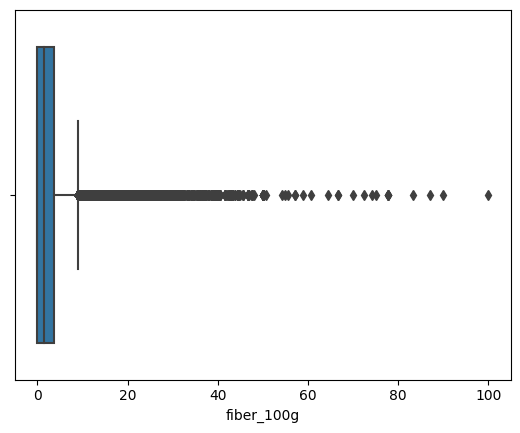

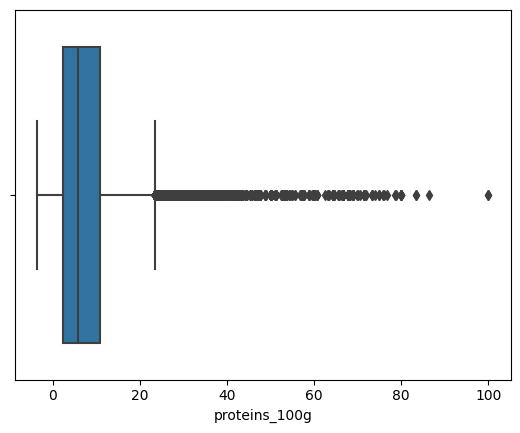

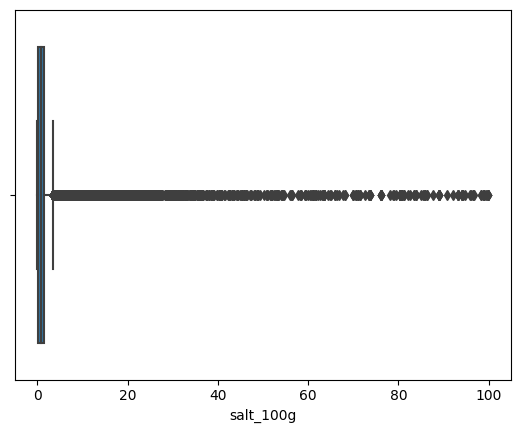

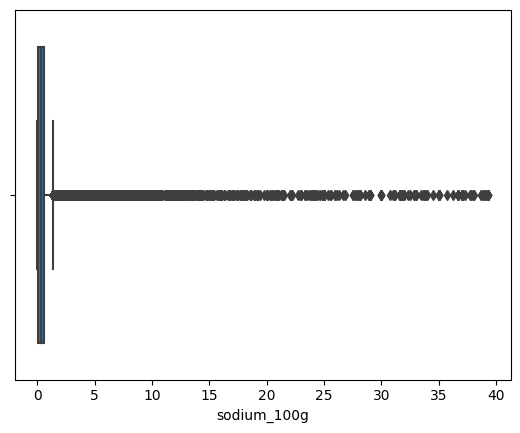

In [17]:
col=['additives_n','energy_100g', 'fat_100g'
        , 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g']

#On contrôle les distribution de ses variables.   
for v in col:
    ax=sns.boxplot(data=data,x=v)
    plt.show()

**We get rid of the outliers in energy_100g**

In [18]:
data = data[data['energy_100g']<=3700]

We create a new "nutrition_score_100g" column by eliminating all "nutrition_score_uk_100g$\neq$ nutrition_score_fr_100g" values.

In [19]:
data['nutrition-score_100g'] = data['nutrition-score-uk_100g'][data['nutrition-score-uk_100g'] == data['nutrition-score-fr_100g']]

In [20]:
data = data.drop(columns=['nutrition-score-uk_100g', 'nutrition-score-fr_100g', 'categories', 'categories_tags', 'categories_fr'])

In [21]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
count,122267.000000,122267.000000,122267.000000,122554.000000,122554.000000,122554.000000,122554.000000,122345.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122428.000000,122469.000000
mean,2.058724,0.000164,0.023776,1216.253453,13.345819,4.707410,0.063238,0.018028,35.806477,15.512636,2.842967,7.973726,1.285490,0.506098,0.000131,0.006133,0.092234,0.002433,9.472805
std,2.573653,0.012789,0.154377,735.121566,15.151293,6.699842,0.932160,0.274410,28.135378,19.561110,4.340711,8.163043,3.613765,1.422726,0.000542,0.108043,0.256176,0.151847,9.010774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,0.000000,-3.570000,0.000000,0.000000,0.000000,-0.002100,0.000000,-0.000260,-10.000000
25%,0.000000,0.000000,0.000000,506.000000,0.880000,0.000000,0.000000,0.000000,9.410000,1.670000,0.000000,2.380000,0.149860,0.059000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,1280.000000,7.970000,1.790000,0.000000,0.000000,28.890000,6.060000,1.500000,5.710000,0.756920,0.298000,0.000000,0.000000,0.035000,0.000970,10.000000
75%,3.000000,0.000000,0.000000,1766.000000,21.430000,7.140000,0.000000,0.020000,60.710000,24.690000,3.600000,10.810000,1.450340,0.571000,0.000100,0.002100,0.100000,0.002400,17.000000
max,31.000000,1.000000,2.000000,3699.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,99.905820,39.333000,0.051818,35.714300,50.000000,50.000000,37.000000


In [22]:
data.head()

,product_name,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
1,Banana Chips Sweetened (Whole),US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,...,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
2,Peanuts,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,...,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
77,Granola Cranberry And Acai,US,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,NaN,NaN,0.0,0.0,...,25.45,5.5,9.09,0.25400,0.100,0.0,0.0000,0.036,0.00262,6.0
80,"Peanuts, Mixed Nuts",US,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,[ peanuts -> en:peanuts ] [ honey -> en:hon...,en:e415,E415 - Gomme xanthane,0.0,0.0,...,14.29,7.1,25.00,0.54356,0.214,0.0,0.0000,0.071,0.00514,14.0
146,Cranberries,US,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,[ cranberries -> en:cranberries ] [ sugar -...,NaN,NaN,0.0,0.0,...,66.67,10.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,8.0


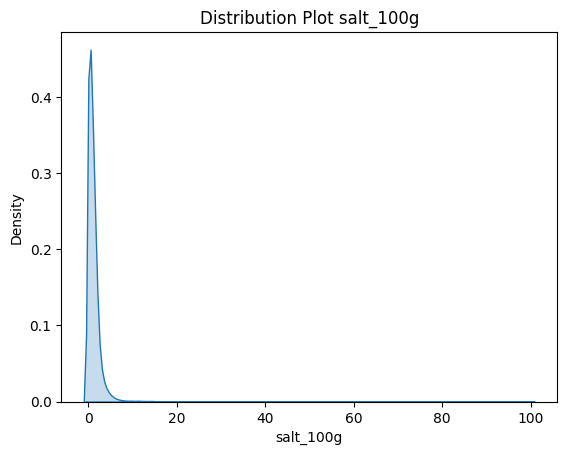

In [23]:
sns.kdeplot(data['salt_100g'], fill=True).set_title('Distribution Plot salt_100g');

In [24]:
data['nutrition_grade_fr'].unique()

array(['d', 'b', 'c', 'e', 'a', nan], dtype=object)

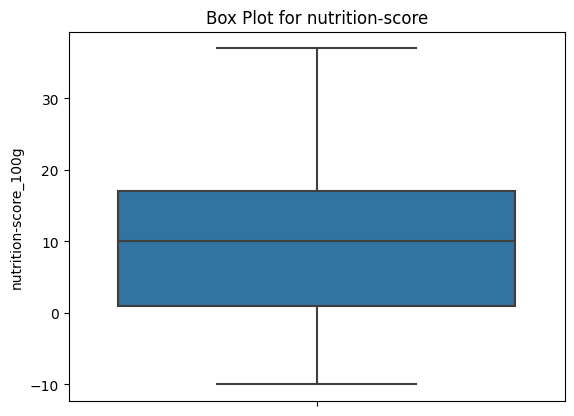

In [25]:
sns.boxplot(y='nutrition-score_100g', data=data).set_title('Box Plot for nutrition-score');

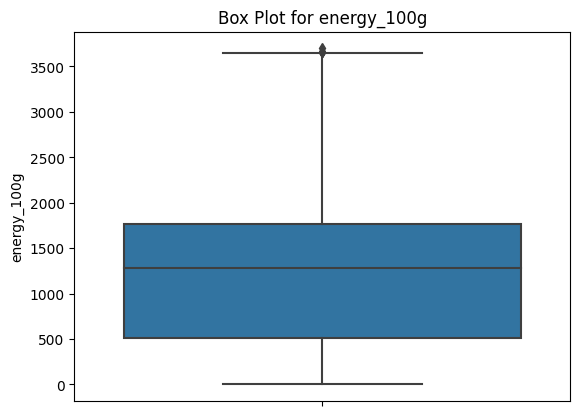

In [26]:
sns.boxplot(y='energy_100g', data=data).set_title('Box Plot for energy_100g');

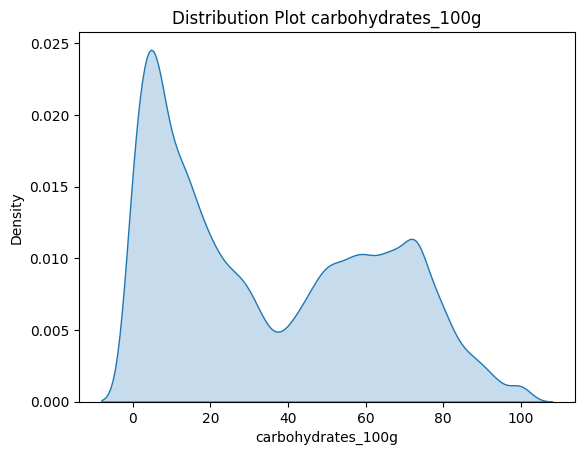

In [27]:
sns.kdeplot(data['carbohydrates_100g'], fill=True).set_title('Distribution Plot carbohydrates_100g')
plt.savefig("kde_a_file.png")

In [28]:
data['nutrition_grade_fr'].isna().sum()

5

In [29]:
# remove the null values in the nutition grade
data=data.dropna(subset=['nutrition_grade_fr'])
data['nutrition_grade_fr'].isna().sum()

0

In [30]:
data.columns = ['nutritiongrade' if x=='nutrition_grade_fr' else x for x in data.columns]

Text(0.5, 1.0, 'Pie Plot for nutritiongrade')

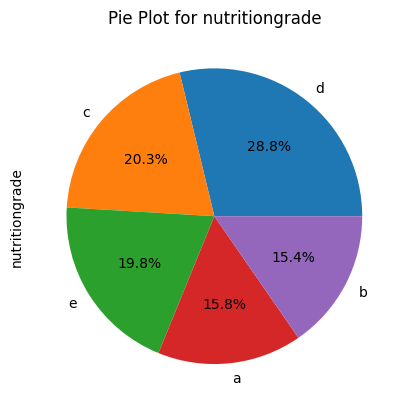

In [31]:
data['nutritiongrade'].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%').set_title('Pie Plot for nutritiongrade')

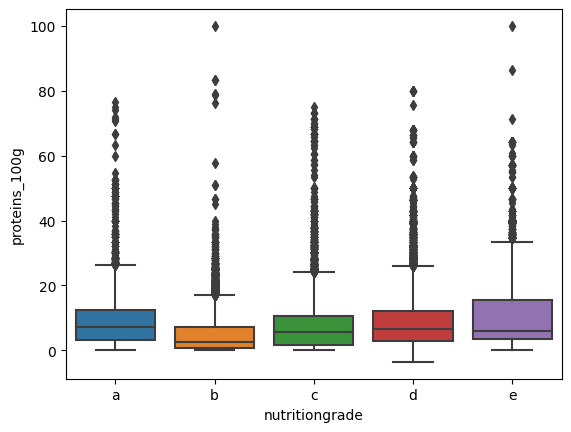

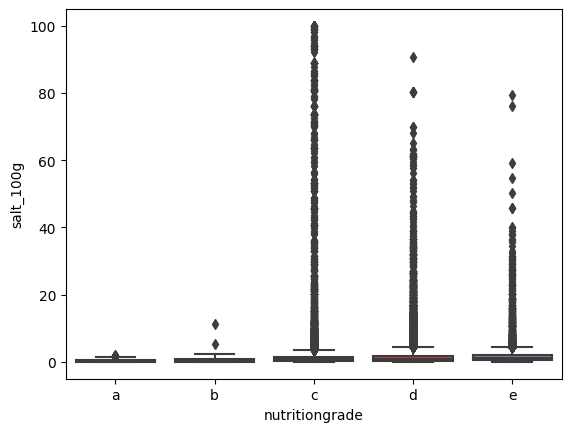

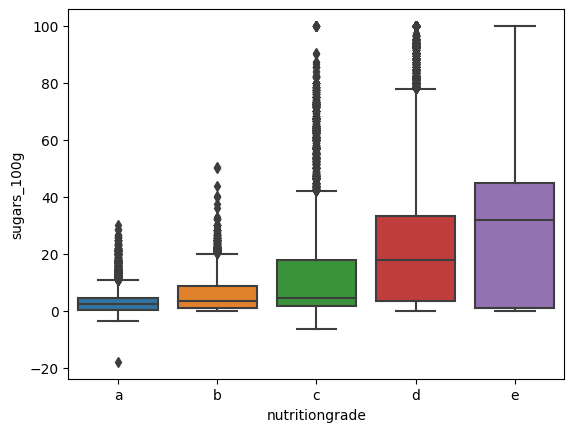

<Figure size 640x480 with 0 Axes>

In [32]:
col=['proteins_100g', 'salt_100g', 'sugars_100g']
#On contrôle les distribution de ses variables.   
for v in col:
    ax=sns.boxplot(data=data,y=v, x='nutritiongrade', order=['a', 'b', 'c', 'd', 'e'])
    plt.show()
    plt.tight_layout()

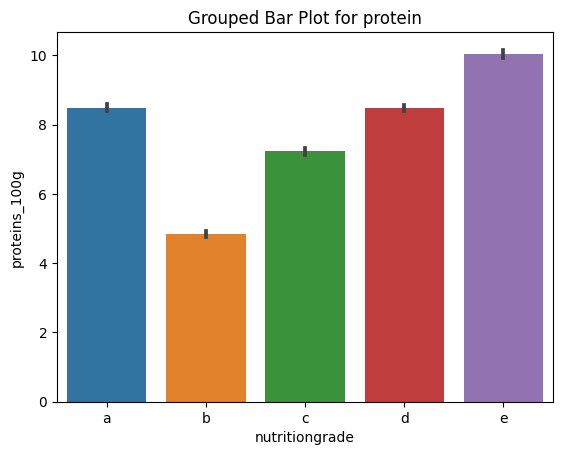

In [33]:
sns.barplot(x='nutritiongrade', y='proteins_100g', order=['a', 'b', 'c', 'd', 'e'], data=data).set_title('Grouped Bar Plot for protein')
plt.savefig("barplot1.png")

In [34]:
data['nutritiongrade'].value_counts()

d    35273
c    24842
e    24234
a    19363
b    18837
Name: nutritiongrade, dtype: int64

In [35]:
data.isna().sum()

product_name                                  108
countries                                       0
ingredients_text                              287
serving_size                                    5
additives_n                                   287
additives                                     292
additives_tags                              40481
additives_fr                                40481
ingredients_from_palm_oil_n                   287
ingredients_that_may_be_from_palm_oil_n       287
nutritiongrade                                  0
pnns_groups_1                              121280
pnns_groups_2                              121280
states                                          0
states_tags                                     0
states_fr                                       0
main_category                              121503
main_category_fr                           121503
energy_100g                                     0
fat_100g                                        0


**Save the clean data**

In [36]:
data.to_csv('food.csv', index=False)

In [37]:
df=pd.read_csv('food.csv')
df.head()

,product_name,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
0,Banana Chips Sweetened (Whole),US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,...,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
1,Peanuts,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,...,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
2,Granola Cranberry And Acai,US,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,NaN,NaN,0.0,0.0,...,25.45,5.5,9.09,0.25400,0.100,0.0,0.0000,0.036,0.00262,6.0
3,"Peanuts, Mixed Nuts",US,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,[ peanuts -> en:peanuts ] [ honey -> en:hon...,en:e415,E415 - Gomme xanthane,0.0,0.0,...,14.29,7.1,25.00,0.54356,0.214,0.0,0.0000,0.071,0.00514,14.0
4,Cranberries,US,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,[ cranberries -> en:cranberries ] [ sugar -...,NaN,NaN,0.0,0.0,...,66.67,10.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,8.0


In [38]:
df.shape

(122549, 34)

In [39]:
df.isna().sum()

product_name                                  108
countries                                       0
ingredients_text                              287
serving_size                                    5
additives_n                                   287
additives                                     292
additives_tags                              40481
additives_fr                                40481
ingredients_from_palm_oil_n                   287
ingredients_that_may_be_from_palm_oil_n       287
nutritiongrade                                  0
pnns_groups_1                              121280
pnns_groups_2                              121280
states                                          0
states_tags                                     0
states_fr                                       0
main_category                              121503
main_category_fr                           121503
energy_100g                                     0
fat_100g                                        0


In [40]:
df.columns

Index(['product_name', 'countries', 'ingredients_text', 'serving_size',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutritiongrade',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score_100g'],
      dtype='object')

In [41]:
df = df[df.pnns_groups_1 != 'unknown']

In [42]:
df['pnns_groups_1'].unique()

array([nan, 'Sugary snacks', 'Composite foods', 'Milk and dairy products',
       'Cereals and potatoes', 'Fat and sauces', 'Fish Meat Eggs',
       'Salty snacks', 'Fruits and vegetables', 'Beverages',
       'fruits-and-vegetables'], dtype=object)

In [43]:
df['pnns_groups_2'].unique()

array([nan, 'Biscuits and cakes', 'Pizza pies and quiche',
       'One-dish meals', 'Milk and yogurt', 'Cereals',
       'Dressings and sauces', 'Chocolate products', 'Sweets', 'Bread',
       'Meat', 'Nuts', 'Vegetables', 'Legumes', 'Appetizers',
       'Sweetened beverages', 'Fruit juices', 'Eggs',
       'Non-sugared beverages', 'Breakfast cereals', 'Fruits',
       'Fish and seafood', 'Cheese', 'Ice cream', 'Processed meat',
       'Fats', 'Dried fruits', 'vegetables', 'Soups', 'Dairy desserts',
       'Artificially sweetened beverages'], dtype=object)

### Let us check what is the sugar content in Fruit juice in terms of nutrigrade.

In [44]:
frudrinks=df[df['pnns_groups_2']=='Fruit juices']
frudrinks.head(5)

,product_name,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
7244,Strawberry Lemonade,United States,NaN,1 can (12 FL OZ) 355 mL,NaN,NaN,NaN,NaN,NaN,NaN,...,5.560,0.0,0.000,0.00353,0.001390,0.0,0.00333,0.00000,0.000000,NaN
9017,coconut juice,"France,États-Unis",NaN,240 ml,NaN,NaN,NaN,NaN,NaN,NaN,...,6.250,0.0,0.000,0.09530,0.037500,0.0,0.00000,0.02500,0.000225,NaN
9018,Roasted Coconut Juice,"France,États-Unis",NaN,350 ml (1 CAN),NaN,NaN,NaN,NaN,NaN,NaN,...,8.900,0.0,0.500,0.12000,0.047244,0.0,0.00000,0.00600,0.000100,NaN
45740,Orange Juice,United States,ORGANIC ORANGE JUICE,8 fl oz (240 mL),0.0,[ organic-orange-juice -> en:organic-orange-j...,NaN,NaN,0.0,0.0,...,0.833,0.0,0.417,0.00000,0.000000,0.0,0.03000,0.00833,0.000000,NaN
46140,Oasis - Jus de pomme 100% pur,Canada,"Jus de pomme fait de concentré(eau, jus concen...",250 ml,1.0,[ jus-de-pomme-fait-de-concentre -> fr:jus-de...,en:e300,E300 - Acide ascorbique,0.0,0.0,...,9.600,0.0,0.000,0.01520,0.006000,0.0,0.02400,0.00800,0.000144,NaN


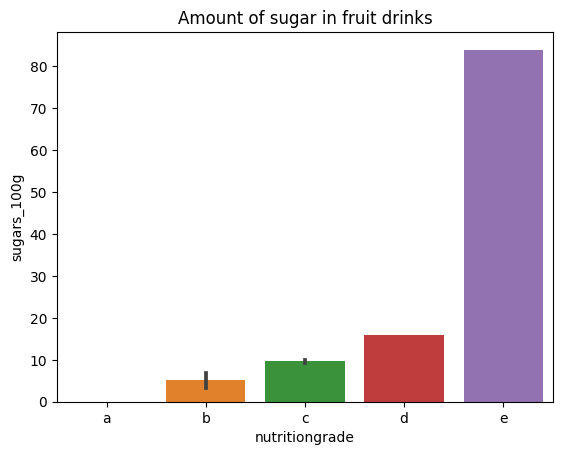

In [45]:
sns.barplot(x='nutritiongrade', y='sugars_100g', order=['a','b','c','d', 'e'], data= frudrinks)
plt.title('Amount of sugar in fruit drinks')
plt.savefig("barplot3.png")

**Check each category the sugar content in each category in pnns_group1 & pnns_group2**

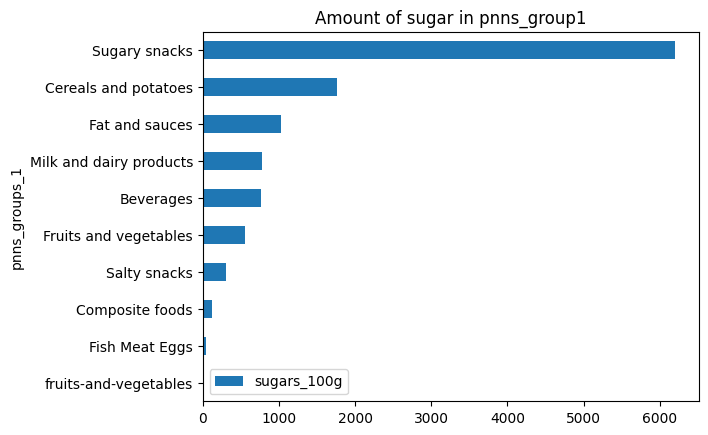

In [46]:
df.groupby('pnns_groups_1')[['sugars_100g']].sum().sort_values(by='sugars_100g').plot(kind='barh')
plt.title('Amount of sugar in pnns_group1');

In [47]:
s=df.groupby('pnns_groups_2')[['sugars_100g']].sum().sort_values(by='sugars_100g')
s= s.squeeze()

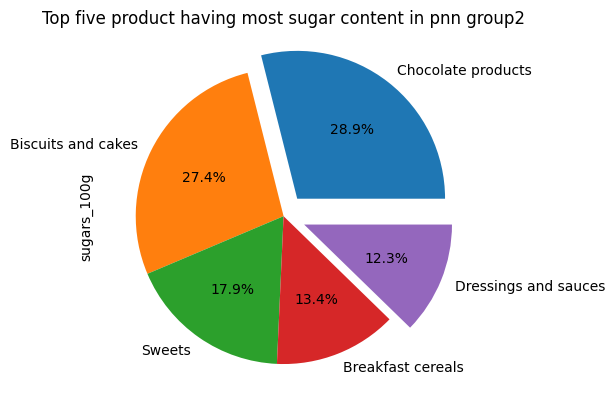

In [48]:
s.nlargest(5).plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%', explode=(0.15, 0, 0, 0, 0.15))
plt.title('Top five product having most sugar content in pnn group2');

## Test de ANOVA (Type 1 & Type 2)

I do the ANOVA test.

In [49]:
data1=pd.DataFrame(df, columns = ['main_category', 'countries', 
                                         'calcium_100g', 'sugars_100g', 'salt_100g', 'proteins_100g', 'nutritiongrade'])

In [50]:
data1.head()

,main_category,countries,calcium_100g,sugars_100g,salt_100g,proteins_100g,nutritiongrade
0,NaN,US,0.000,14.29,0.00000,3.57,d
1,NaN,US,0.071,17.86,0.63500,17.86,b
2,NaN,US,0.036,25.45,0.25400,9.09,c
3,NaN,US,0.071,14.29,0.54356,25.00,d
4,NaN,US,0.000,66.67,0.00000,0.00,c


In [51]:
data1 = data1.rename(columns={'main_category': 'maincategory', 'countries': 'countries', 'calcium_100g': 'calcium', 'salt_100g': 'salt', 'proteins_100g': 'proteins', 'sugars_100g': 'sugars', 'nutritiongrade': 'nutritiongrade'})

One way ANOVA test

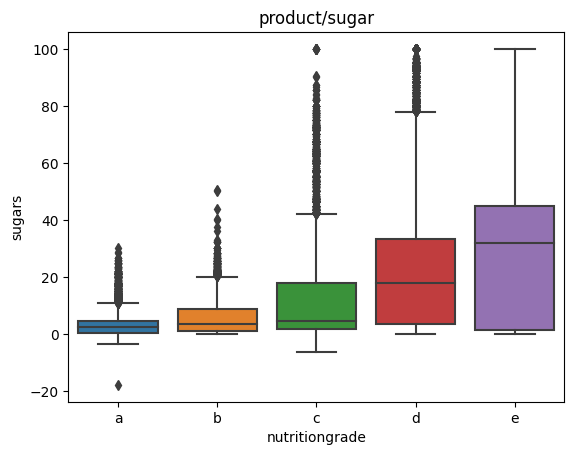

In [52]:
sns.boxplot(x='nutritiongrade', y='sugars', order=['a','b','c','d', 'e'], data= data1).set_title('product/sugar');

In [53]:
data1['nutritiongrade'].value_counts()

d    35141
c    24729
e    24158
a    19306
b    18761
Name: nutritiongrade, dtype: int64

In [54]:
model = ols('sugars ~ C(nutritiongrade)', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table
# output (ANOVA F and p value)

,sum_sq,df,F,PR(>F)
C(nutritiongrade),1.002572e+07,4.0,8339.006715,0.0
Residual,3.669623e+07,122090.0,NaN,NaN


**Note p value obtained from ANOVA analysis is significant (p < 0.05), therefore, we conclude that there are significant differences among the nutrition grades.**

**For the two way ANOVA test, we create a dataframe containing the countries US, FR and Canada.**

In [55]:
data1['countries'].unique()

array(['US', 'Canada', 'United States', 'États-Unis', 'France, US',
       'en:US', 'France,Suisse,États-Unis,Canada', 'France', 'en:FR, US',
       'France,United States', 'en:GB, US', 'Pays-Bas, US',
       'France,États-Unis', 'United States, en:france', 'US,Switzerland',
       'Deutschland,Vereinigte Staaten von Amerika',
       'United States,Deutschland', 'France,États-Unis,Suisse',
       'Spanien,Denmark, US', 'en:MY, US', 'en:GY, US', 'en:BH, US',
       'en:AU, US', 'Canada, US',
       'United States, en:france, en:switzerland', 'en:IT, US',
       'en:CH, US', 'en:CA, US', 'España, Estados Unidos',
       'Canada,United States', 'United states', 'UK,France,US',
       'Costa Rica, US', 'en:NL, US', 'Canada,France',
       'Saint-Pierre-et-Miquelon', 'United States,Canada',
       'France,Suisse,États-Unis', 'en:MX, US', 'en:PF, US',
       'United Kingdom, US', 'en:US, US', 'en:CL, US',
       'Australia,Indonesia,United States', 'Canada,États-Unis',
       'France,Suisse'

In [56]:
d1=data1[data1['countries']=='US']

In [57]:
d2=data1[data1['countries']=='France']

In [58]:
d3=data1[data1['countries']=='Canada']

In [59]:
frame=[d1,d2,d3]

In [60]:
data2=pd.concat(frame, axis=0)
data2.head()

,maincategory,countries,calcium,sugars,salt,proteins,nutritiongrade
0,NaN,US,0.000,14.29,0.00000,3.57,d
1,NaN,US,0.071,17.86,0.63500,17.86,b
2,NaN,US,0.036,25.45,0.25400,9.09,c
3,NaN,US,0.071,14.29,0.54356,25.00,d
4,NaN,US,0.000,66.67,0.00000,0.00,c


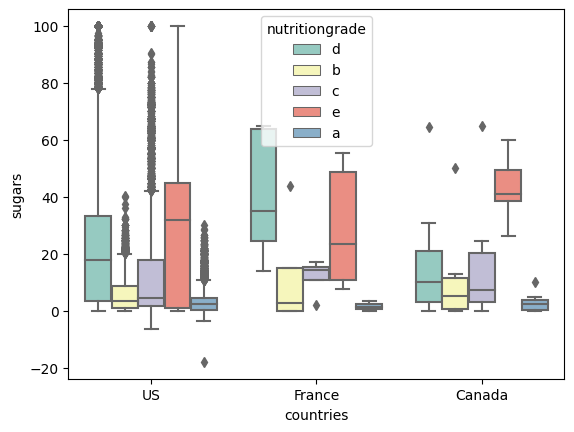

In [61]:
sns.boxplot(x='countries', y='sugars', hue='nutritiongrade', data=data2, palette="Set3");

### Anova 2 test for the countries US, Canada, France

In [62]:
model = ols('sugars~ C(nutritiongrade) + C(countries) + C(nutritiongrade):C(countries)', data=data2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(nutritiongrade),9.971205e+06,4.0,8274.784308,0.000000
C(countries),1.021913e+03,2.0,1.696106,0.183401
C(nutritiongrade):C(countries),5.328165e+03,8.0,2.210837,0.023709
Residual,3.647749e+07,121086.0,NaN,NaN


The p value obtained from ANOVA analysis for 
- The nutritiongrade has significant impact on sugar content

- The countries have no significant impact on the sugar content

- The interaction have no significant impact on the sugar content

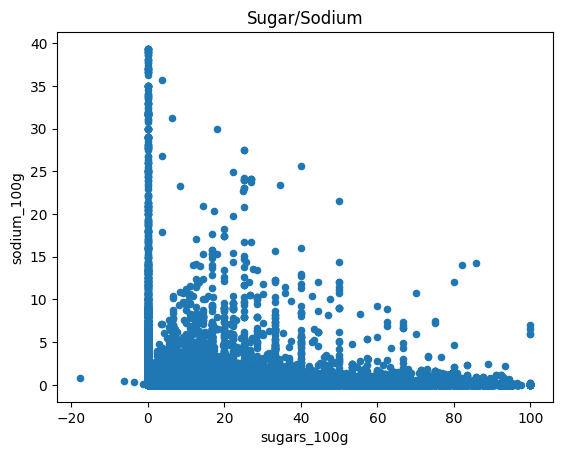

In [63]:
fig = data.plot(kind = 'scatter', x="sugars_100g", y="sodium_100g", title="Sugar/Sodium")
plt.savefig("scatt2.png")

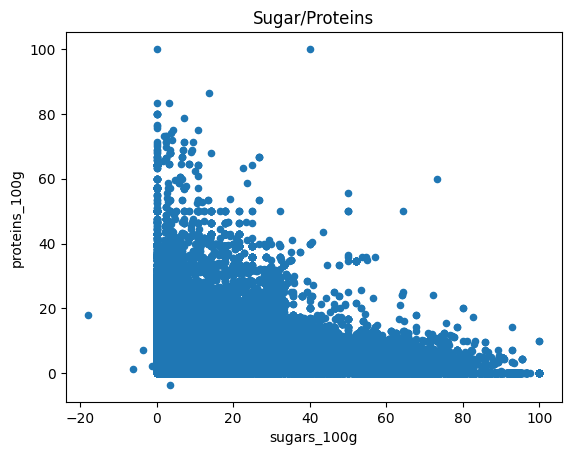

In [64]:
fig = df.plot(kind = 'scatter', x="sugars_100g", y="proteins_100g", title="Sugar/Proteins")
plt.savefig("scatt1.png")

In [65]:
data_sugar=df[['product_name', 'sugars_100g']][0: 10]
data_sugar = data_sugar.sort_values(['sugars_100g'])

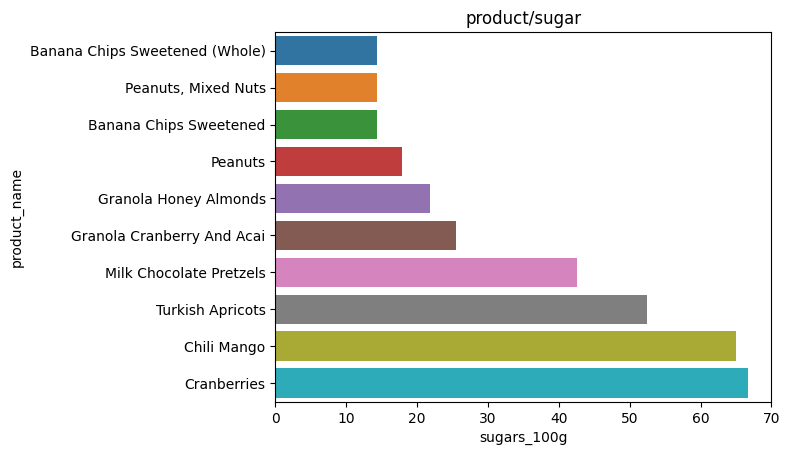

In [66]:
sns.barplot(y='product_name', x='sugars_100g', data= data_sugar).set_title('product/sugar')
plt.savefig("barhor.png")

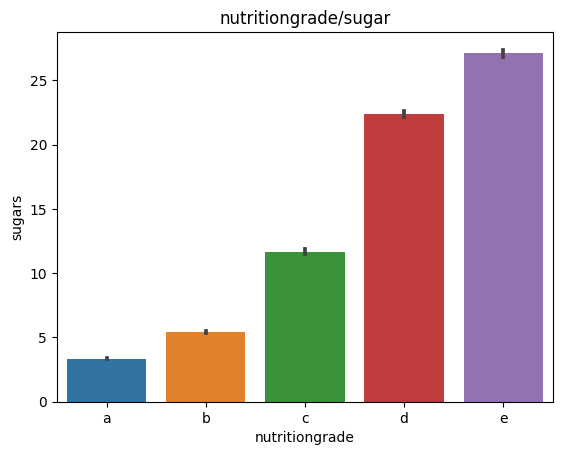

In [67]:
result = data1.groupby(['nutritiongrade'])['sugars'].aggregate(np.median).reset_index().sort_values('sugars')
sns.barplot(x='nutritiongrade', y='sugars', data= data1, order=result['nutritiongrade']).set_title('nutritiongrade/sugar')
plt.savefig("barver.png")

Text(0.5, 1.0, 'nutritiongrade/protein')

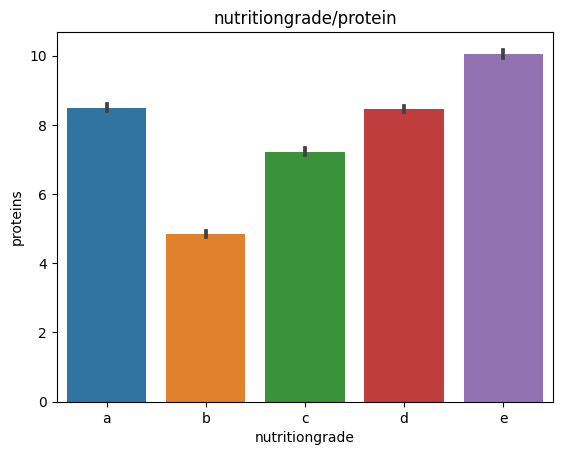

In [68]:
sns.barplot(x='nutritiongrade', y='proteins', data= data1, order=['a', 'b', 'c', 'd','e']).set_title('nutritiongrade/protein')

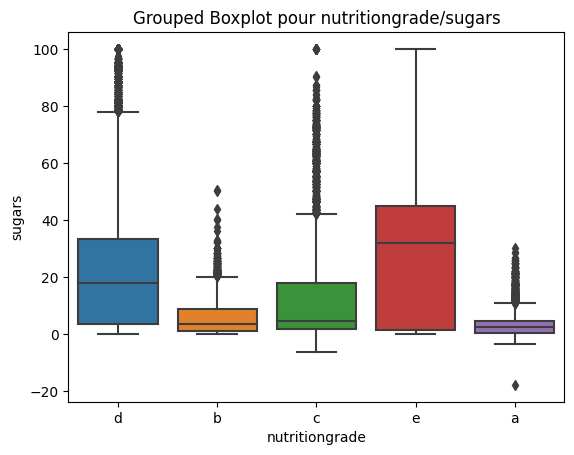

In [69]:
sns.boxplot(x='nutritiongrade', y='sugars', data=data1).set_title('Grouped Boxplot pour nutritiongrade/sugars');

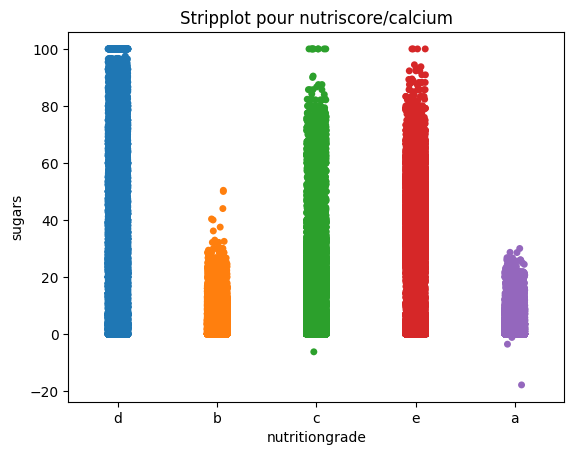

In [70]:
sns.stripplot(x='nutritiongrade', y="sugars", data=data1).set_title('Stripplot pour nutriscore/calcium');

## ACP test & Scree plot

In [71]:
df = df._get_numeric_data()
df.head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
0,0.0,0.0,0.0,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
1,0.0,0.0,0.0,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
2,0.0,0.0,0.0,1824.0,10.91,0.91,0.0,0.000,74.55,25.45,5.5,9.09,0.25400,0.100,0.0,0.0000,0.036,0.00262,6.0
3,1.0,0.0,0.0,2389.0,42.86,7.14,0.0,0.000,25.00,14.29,7.1,25.00,0.54356,0.214,0.0,0.0000,0.071,0.00514,14.0
4,0.0,0.0,0.0,1255.0,0.00,0.00,0.0,0.000,83.33,66.67,10.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,8.0


In [72]:
df.columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score_100g'],
      dtype='object')

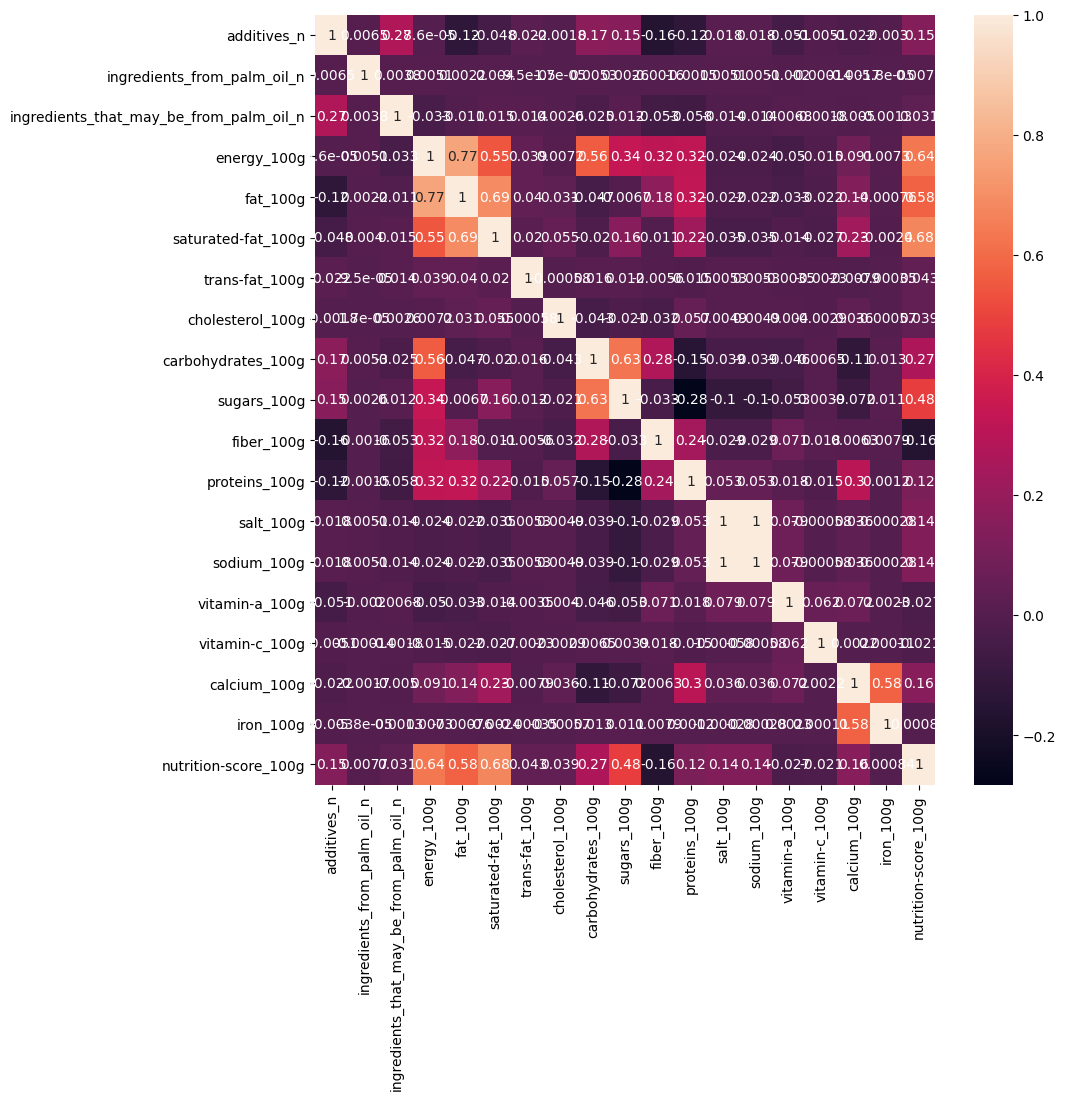

In [73]:
plt.figure(figsize =(10 ,10))
sns.heatmap(df.corr(), annot = True);

In [74]:
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation

In [75]:
sol.head()

salt_100g           sodium_100g             1.000000
energy_100g         fat_100g                0.768933
fat_100g            saturated-fat_100g      0.689570
saturated-fat_100g  nutrition-score_100g    0.679210
energy_100g         nutrition-score_100g    0.637118
dtype: float64

**We remove the columns with high correlation**

In [76]:
dg = df.drop(columns=['sodium_100g', 'fat_100g'])

**We remove some columns for the simplicity**

In [77]:
dg=dg.drop(columns=['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 
                 'trans-fat_100g','saturated-fat_100g', 'vitamin-a_100g', 'vitamin-c_100g', 'cholesterol_100g', 
                   'cholesterol_100g', 'fiber_100g', 'iron_100g'])

In [78]:
dg=dg.fillna(0)
dg.columns

Index(['energy_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'calcium_100g', 'nutrition-score_100g'],
      dtype='object')

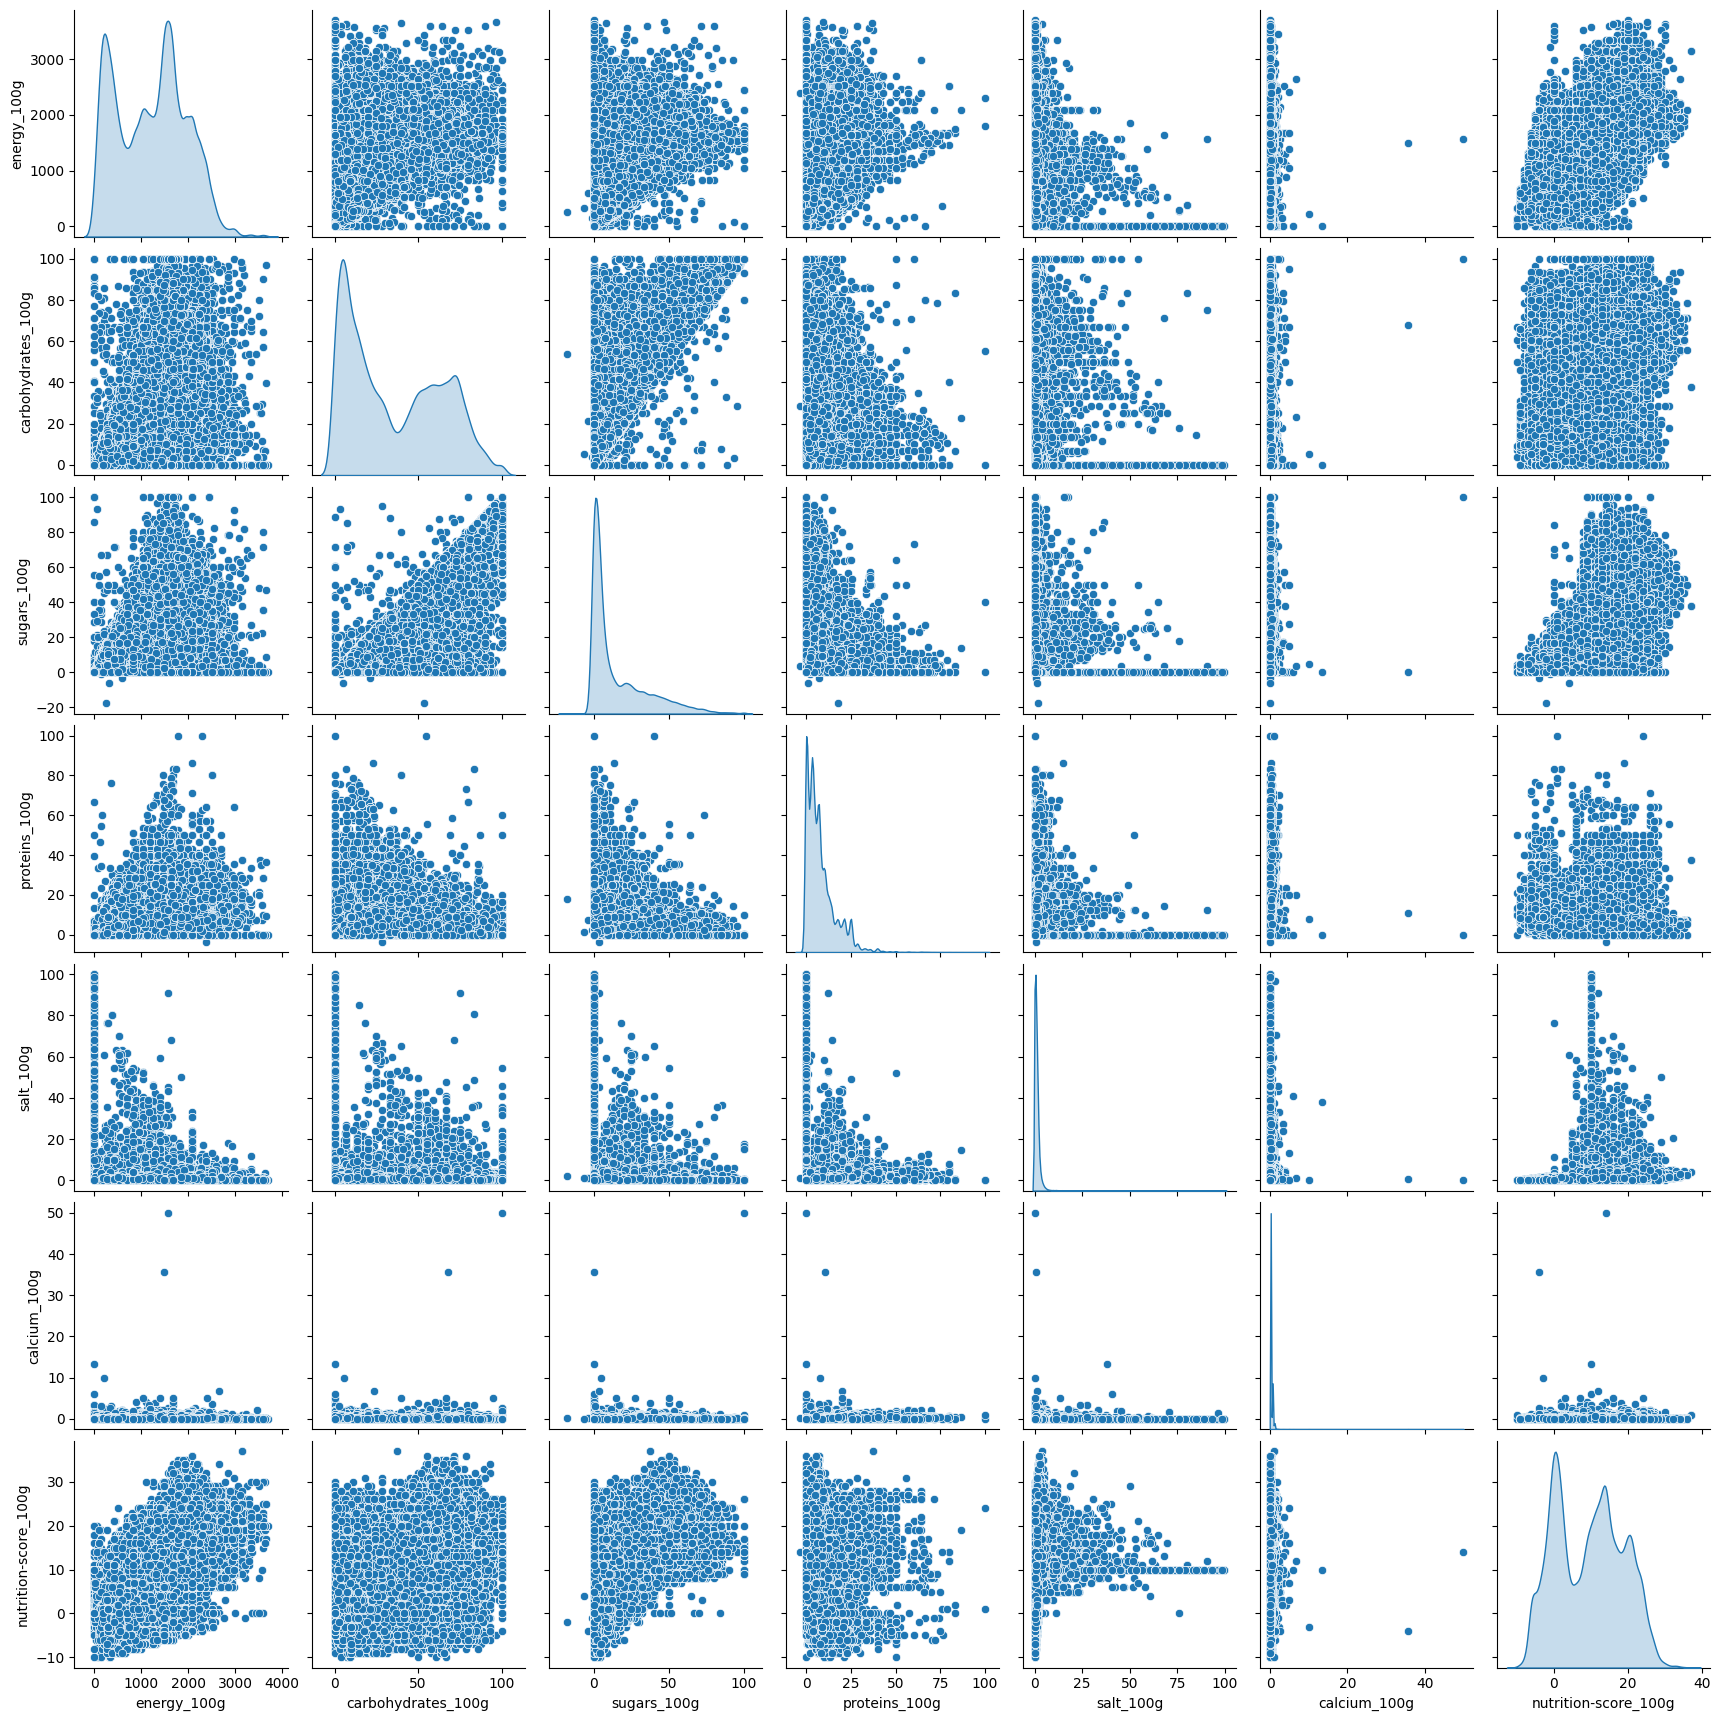

In [79]:
sns.pairplot(dg, diag_kind='kde');

In [80]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dg)
scaled_data

array([[ 1.3970363 ,  1.01247147, -0.06282304, ..., -0.3576518 ,
        -0.35966367,  0.50287368],
       [ 0.98618892,  0.88522227,  0.11967435, ..., -0.1806267 ,
        -0.08287317, -1.0502963 ],
       [ 0.82701958,  1.37715775,  0.507673  , ..., -0.28684176,
        -0.21931919, -0.38465202],
       ...,
       [ 0.2406778 ,  0.89944005,  0.76889475, ..., -0.09211414,
         1.80787885,  0.17005155],
       [ 0.35495322,  1.82181909, -0.67319246, ..., -0.34915459,
        -0.35966367, -1.16123701],
       [-1.65438973, -1.2726826 , -0.7933238 , ..., -0.3576518 ,
        -0.35966367, -1.0502963 ]])

In [81]:
scaled_data.shape

(122095, 7)

### Visualisation in two dimension

In [82]:
pca=PCA(n_components=2)

In [83]:
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[ 1.43588711, -0.34004461],
       [ 0.5246414 ,  0.48367409],
       [ 1.18294737, -0.43134895],
       ...,
       [ 1.07391936,  0.368711  ],
       [ 0.18419205, -1.1934216 ],
       [-2.41760042, -1.02662098]])

In [84]:
pDf = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])
pDf.head()

,principal component 1,principal component 2
0,1.435887,-0.340045
1,0.524641,0.483674
2,1.182947,-0.431349
3,0.885429,1.926466
4,2.060031,-2.119723


In [85]:
finalDf = pd.concat([pDf, data1[['nutritiongrade']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,nutritiongrade
0,1.435887,-0.340045,d
1,0.524641,0.483674,b
2,1.182947,-0.431349,c
3,0.885429,1.926466,d
4,2.060031,-2.119723,c


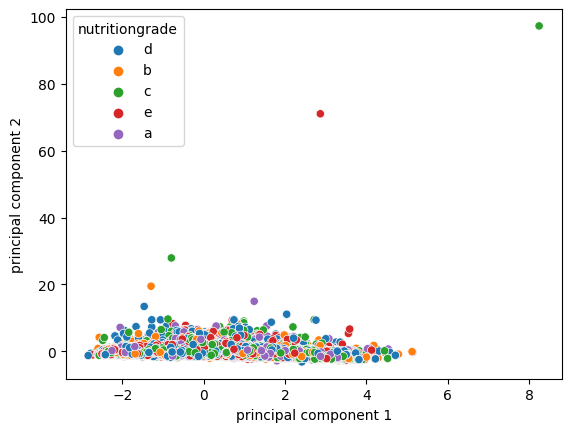

In [86]:
sns.scatterplot(x='principal component 1', y='principal component 2', hue='nutritiongrade', data=finalDf)
plt.savefig("acp.png")

In [87]:
num_components = 5
# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(scaled_data)
nwD=pca.transform(scaled_data)
pcs = pca.components_ 
pca.explained_variance_ratio_.cumsum()

array([0.351063  , 0.58174852, 0.72670422, 0.84299523, 0.92930561])

In [83]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

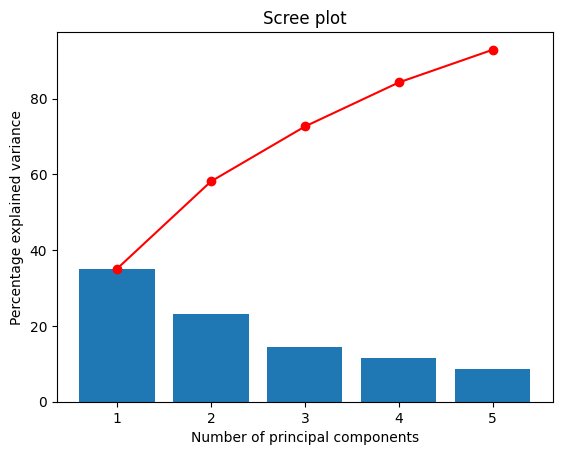

In [84]:
display_scree_plot(pca)

## Circle of correlation

In [85]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(5,5))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="green")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            nr=d1+1
            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
            d = {'values': pca.components_[d1], 'factors': labels}
            df1= pd.DataFrame(d)
            df1.set_index('factors')
            df2=df1.sort_values(by='values', ascending=False)
            df3=df1.sort_values(by='values', ascending=True)
            print("Principal Component" + str(nr)+ " Presenting Values")
            print(df2.head(3))
            print(df3.head(3))
            
            nr=d2+1
            
            d = {'values': pca.components_[d2], 'factors': labels}
            df1= pd.DataFrame(d)
            df1.set_index('factors')
            df2=df1.sort_values(by='values', ascending=False)
            df3=df1.sort_values(by='values', ascending=True)
            print("Principal Component" + str(nr)+ " Presenting Values")
            print(df2.head(3))
            print(df3.head(3))

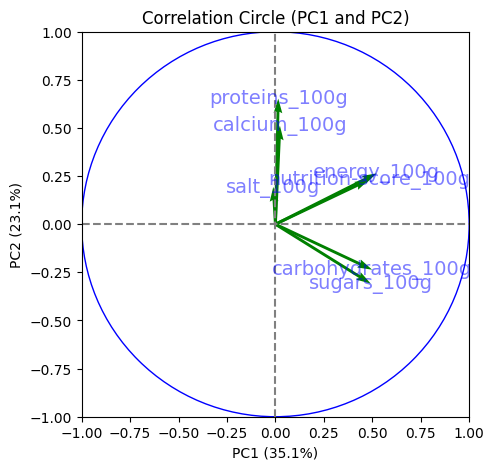

Principal Component1 Presenting Values
   values             factors
0  0.5226         energy_100g
1  0.4992  carbohydrates_100g
2  0.4920         sugars_100g
   values        factors
4 -0.0111      salt_100g
3  0.0148  proteins_100g
5  0.0232   calcium_100g
Principal Component2 Presenting Values
   values        factors
3  0.6525  proteins_100g
5  0.5123   calcium_100g
0  0.2641    energy_100g
   values             factors
2 -0.3084         sugars_100g
1 -0.2362  carbohydrates_100g
4  0.1937           salt_100g


In [86]:
pca.components_=np.around(pca.components_, decimals=4)
pcs = pca.components_ 
m_1 = display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(dg.columns),)

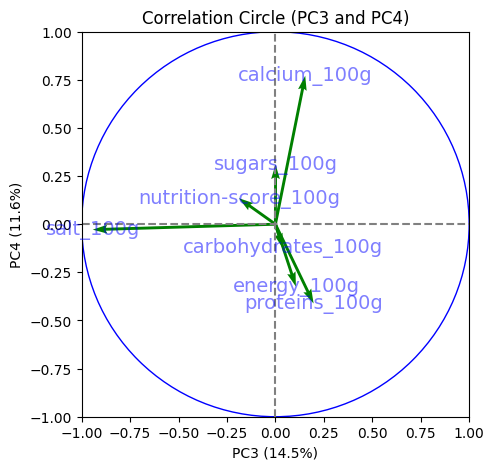

Principal Component3 Presenting Values
   values        factors
3  0.1972  proteins_100g
5  0.1539   calcium_100g
0  0.1058    energy_100g
   values               factors
4 -0.9430             salt_100g
6 -0.1887  nutrition-score_100g
2  0.0009           sugars_100g
Principal Component4 Presenting Values
   values               factors
5  0.7714          calcium_100g
2  0.3104           sugars_100g
6  0.1352  nutrition-score_100g
   values             factors
3 -0.4119       proteins_100g
0 -0.3238         energy_100g
1 -0.1225  carbohydrates_100g


In [87]:
m_2 = display_circles(pcs, num_components, pca, [(2,3)], labels = np.array(dg.columns))